# Clustering using KMeans and Hierarchical clustering 

This lab needs the following packages: `matplotlib`, `scikit-learn`, `pandas`, `numpy`, and `scipy`.
Please make you have them installed in the environment you are using for this lab.

## Part 1a. Clustering using kmeans

In this portion of the lab we will walk through the unsupervised data mining method of k-Means clustering. The first part will use the iris data set (which contains the class each flower belongs to so that we can compare our results).

We first need to import the Iris data set (along with a few packages). This is a well-known data set that contains 150 samples of three iris flower species: Setosa, Virginica, and Versicolor. For each flower, four features are recorded (in cm): sepal length, sepal width, petal length, and petal width. It is available through the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris), but is also contained in the Scikit-learn package datasets.


In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np

%matplotlib inline 

from sklearn.datasets import load_iris
iris=load_iris()

You can look at the data points, variable names, species classification, and species names in the dataset with `iris.data`, `iris.feature_names`, `iris.target`, and `iris.target_names`, respectively. Note you have to run each one separately.


In [99]:
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Now let's explore the data and cluster it. Much of this code is directly from [K Means Clustering in Python](http://stamfordresearch.com/k-means-clustering-in-python/). Before we do anything else, let's turn the data set into a Pandas dataframe. (Recall that `Pandas` has been imported as `pd`.)

In [51]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']


Now to plot the data to see what we even have using `matplotlib.pyplot`. We will create two plots. The first is sepal length against sepal width, and the second is petal length against petal width. (Recall that the `matplotlib.pyplot` has been installed as `plt` and is called in as such below.)

Text(0.5, 1.0, 'Petal')

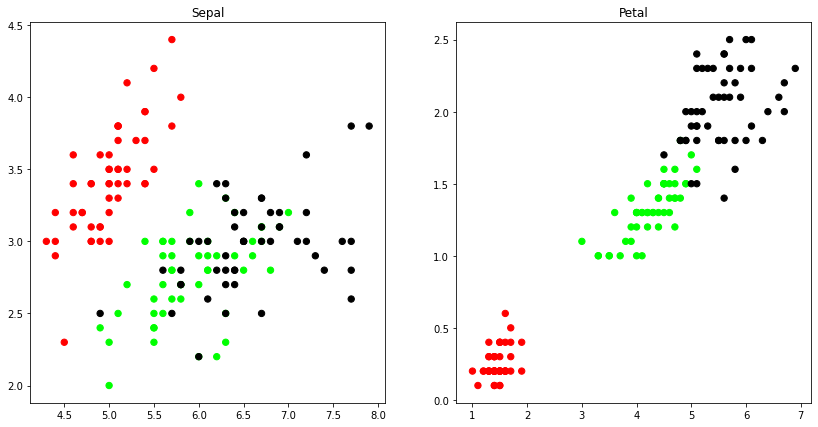

In [52]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
# Plot Petal
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

We already know that there are three species, so we will run k-Means with n=3, however one does not usually know how many clusters to choose going into this. One method used to pick n is described later on.

Now we create the three clusters using the `KMeans` function from `scikit-learn`.

In [53]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)


KMeans(n_clusters=3)

We can begin to explore the results by seeing how k-Means clustered the flowers and by where the centers of the clusters ended up. Note: you need to run them one at a time.

In [54]:
# This is what KMeans thought
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [55]:
# Here are the centers of the clusters
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

The following will let us compare the original classification with the k-Means classification. Note that we are only able to do this because we have the actual species information in the dataset. This is usually not the case.

Text(0.5, 1.0, 'K Mean Classification')

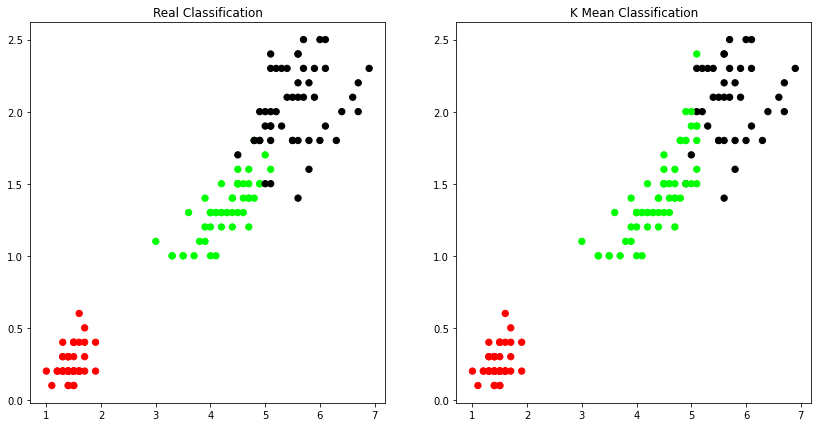

In [56]:
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
 
# Plot the k-Means Classifications
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

Note: if the colors don't match you may need to swap some things around (see the [original website](http://stamfordresearch.com/k-means-clustering-in-python/) for more details).

Since we have the actual species information, we can see how the model does against the actual species classification by looking at the confusion matrix. (Recall that `sm` is the name we gave `sklearn.metrics` when it was imported.)

In [57]:
predY = model.labels_.astype(np.int64)

# Confusion Matrix
sm.confusion_matrix(y, predY)



array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

This matrix shows how well the different species were placed into clusters. Each row represents a species - the first is setosa, the second virginica, and the third is versicolor. The first number in a given row tells you how many flowers were classified into cluster 0, the second number tells you how many were classified into cluster 1, and the last number gives how many were classified into cluster 2. For example, the first row shows that all 50 setosa irises were clustered into the same cluster - cluster 0, while the last row shows that of the 50 versicolor irises, 14 were placed into cluster 1, and 36 were placed into cluster 2.

## Part 1b. Extras and notes

In this section we describe a method to determine the "best" number of clusters. The code for this is adapted directly from [Simple K-means clustering on the Iris dataset](https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset).

We will then cluster a different data set.

First let's look at the "elbow method". The idea here is to run KMeans for many n (the number of clusters) and measure WCSS (within cluster sum of squares). The "best" n is where the graph changes from dropping to becoming more flat. We will discuss what this means as a group, but let's look at the results for the iris data set. Below we see that 2 or 3 clusters is optimal (which makes sense looking at the data).

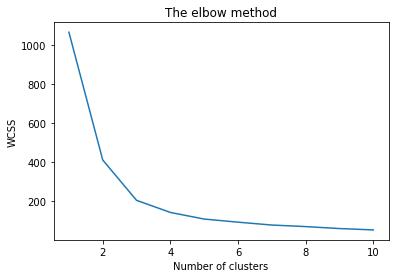

In [72]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()



Now let's try another data set from the UCI repository. This time we will import it directly.

Here is some [information about the dataset](https://archive.ics.uci.edu/ml/datasets/wine).

"These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines."

In [35]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
wine.columns=['Cultivar','Alcohol','Malic_Acid','Ash','Alcalinity_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280_OD315_diluted_wines','Proline']
wine

,Cultivar,Alcohol,Malic_Acid,Ash,Alcalinity_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_diluted_wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


There are 13 variables. Even though we used all four available variables for the Iris dataset, let's just consider two of the variables here: Alcohol and Color Intensity. We will put these two in X, and the "answers", i.e. the cultivar in Y.

In [93]:
X=wine[['Alcohol','Color_intensity']].values
Y=wine['Cultivar'].values


### Question 1 - 4 pts

Now we can apply K Means to this dataset. I am going to leave this up to you, but consider running the elbow test first to determine the number of clusters. Additionally, the target information (Cultivar) is text, not numeric. You'll need to convert the values to integers before using the code above for visualization.

Your end goal should be to use k-Means to create clusters, and then to graph both the clusters and actual cultivar information side-by-side.  

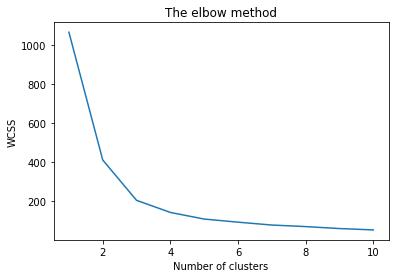

In [74]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


Text(0.5, 1.0, 'K Mean Classification')

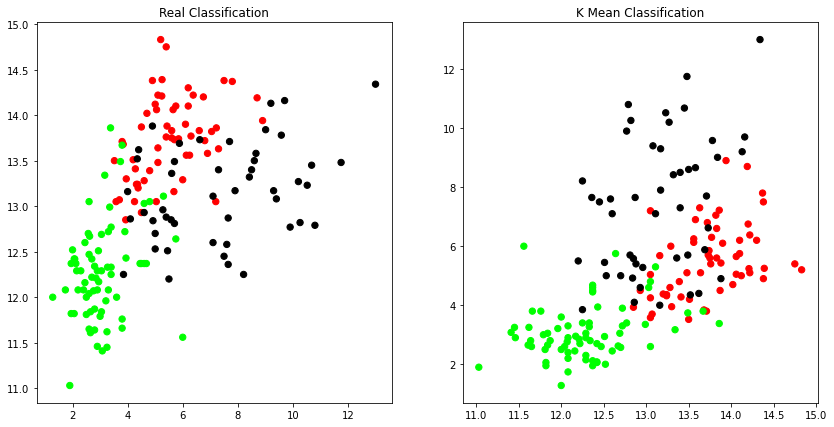

In [83]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)

wine['Cultivar']= wine['Cultivar'].astype(np.int64)

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(wine.Color_intensity, wine.Alcohol, c=colormap[wine.Cultivar-1], s=40)
plt.title('Real Classification')

#K-mean classification
plt.subplot(1, 2, 2)
plt.scatter(wine.Alcohol, wine.Color_intensity, c=colormap[Y-1], s=40)
plt.title('K Mean Classification')
 

## Part 2. Hierarchical Clustering

Here we will look at hierarchical clustering on the Iris dataset. If you haven't used it recently, you may need to re-import the data above. We will again use some functions from `scikit` as well as a few others. 

In [84]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


Recall that a similarity measure tells you how to measure the distance between the points and clusters as they are being joined. We discussed several similarity measures: single linkage, complete linkage, group average, and ward. We can now compare all four using the Iris dataset. To start, we will look at the dendogram resulting from joining up the points using the ward similarity measure. We can then use the dendogram to pick the number of clusters we would like to have in the end. To create this, we need the `scipy` package.

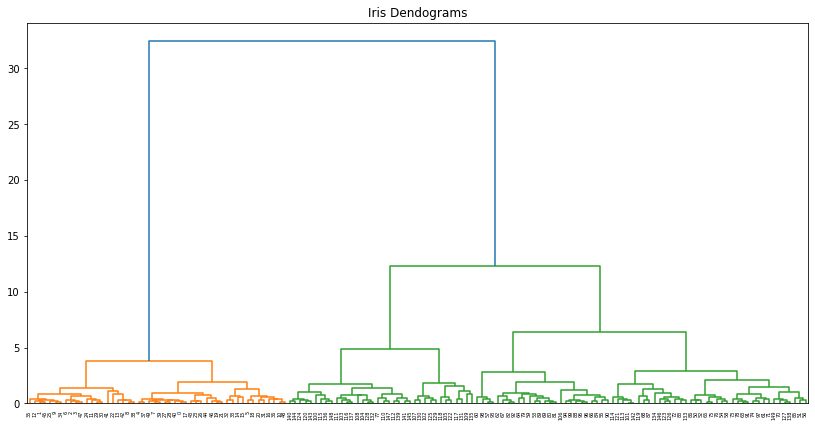

In [85]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(14, 7))  
plt.title("Iris Dendograms")  
dend = sch.dendrogram(sch.linkage(x, method='ward'))  

From the dendogram it makes sense to create 2 or 3 clusters, we will do 3 as before. 

Now we will use hierarchical clustering with n=3 to determine three clusters within the dataset. This code compares all four similarity measures and plots the results side-by-side.

Text(0.5, 1.0, 'Single Linkage')

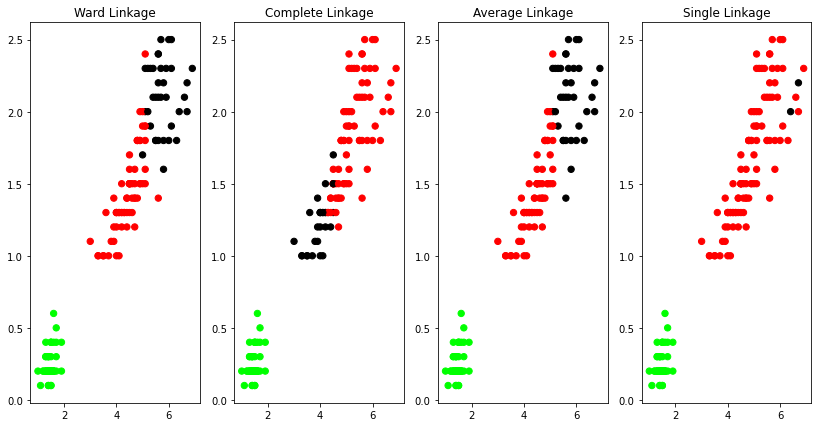

In [15]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'lime', 'black'])

# Run clustering algorithm with Ward linkage and record the results in ward_pred.
ward = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
ward.fit(x)
ward_pred = ward.labels_.astype(np.int)

# Run clustering algorithm with complete linkage and record the results in com_pred.
complete = cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
complete.fit(x)
com_pred = complete.labels_.astype(np.int)

# Run clustering algorithm with average linkage and record the results in avg_pred.
average = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
average.fit(x)
avg_pred = average.labels_.astype(np.int)

# Run clustering algorithm with single linkage and record the results in single_pred.
single = cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
single.fit(x)
single_pred = single.labels_.astype(np.int)

# Plot all four clusterings with respect to petal length and width.
plt.subplot(1, 4, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[ward_pred], s=40)
plt.title('Ward Linkage')
 
plt.subplot(1, 4, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[com_pred], s=40)
plt.title('Complete Linkage')

plt.subplot(1, 4, 3)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[avg_pred], s=40)
plt.title('Average Linkage')

plt.subplot(1, 4, 4)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[single_pred], s=40)
plt.title('Single Linkage')


### Question 3 - 6 pts

Now go try this with another dataset of your choice from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). You should create the dendrogram, pick the number of clusters you want, create them using a similarity measure of your choice, and then plot the result.



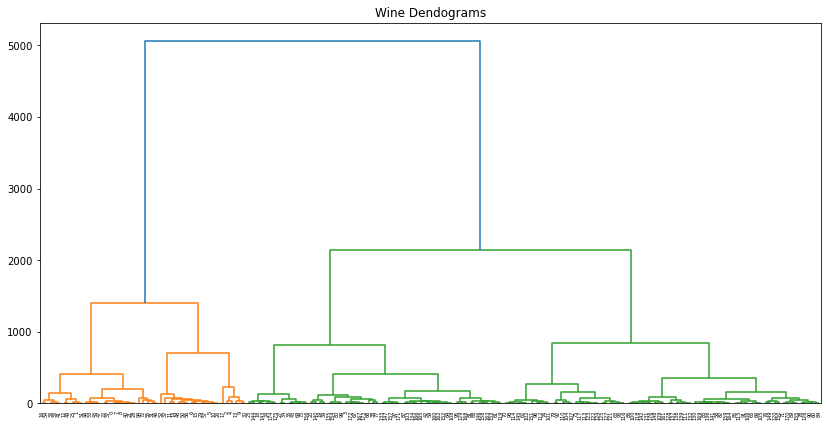

In [101]:
plt.figure(figsize=(14, 7))  
plt.title("Wine Dendograms")  
Winedend = sch.dendrogram(sch.linkage(wine, method='ward'))  

Text(0.5, 1.0, 'Single Linkage')

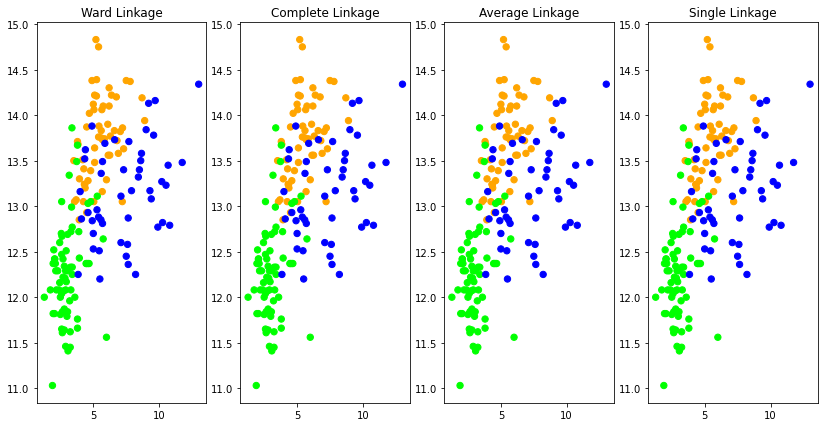

In [107]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['orange', 'lime', 'blue'])

# Run clustering algorithm with Ward linkage and record the results in ward_prediction.
ward = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
ward.fit(wine)
ward_prediction = ward.labels_.astype(np.int)

# Plot all four clusterings with respect to alcohol and color intensity.
plt.subplot(1, 4, 1)
plt.scatter(wine.Color_intensity, wine.Alcohol, c=colormap[wine.Cultivar-1], s=40)
plt.title('Ward Linkage')
 
plt.subplot(1, 4, 2)
plt.scatter(wine.Color_intensity, wine.Alcohol, c=colormap[wine.Cultivar-1], s=40)
plt.title('Complete Linkage')

plt.subplot(1, 4, 3)
plt.scatter(wine.Color_intensity, wine.Alcohol, c=colormap[wine.Cultivar-1], s=40)
plt.title('Average Linkage')

plt.subplot(1, 4, 4)
plt.scatter(wine.Color_intensity, wine.Alcohol, c=colormap[wine.Cultivar-1], s=40)
plt.title('Single Linkage')